# This notebook contains:
* Plots of the study domain using the aus bathymetry dataset and reef data

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as mc
import matplotlib.patches as mpatches
import shapely
from shapely import geos
import netCDF4
import os
import geopandas
import seaborn as sns
import PIL
import metpy.calc as mpcalc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pyproj
import mpl_toolkits
#from mpl_toolkits.basemap import Basemap

In [2]:
# open ds
ds_full = xr.open_dataset('/home/563/ac9768/Aus_Bathymetry/ETOPO2v2c_f4.GQp62nWv.nc.part',engine="netcdf4")

In [3]:
# Open text file with GBR locations to plot
GBR_loc_fp = '/home/563/ac9768/Aus_Bathymetry/GBR_reef_locations.txt'

# Lists to store latitude and longitude pairs
latitudes = []
longitudes = []

# Open the file and read line by line
with open(GBR_loc_fp, 'r') as file:
    for line in file:
        # Split each line into latitude and longitude
        values = line.split()
        if len(values) == 2:  # Ensure there are exactly two values on each line
            latitude, longitude = map(float, values)
            latitudes.append(latitude)
            longitudes.append(longitude)

# make an array which lists (lon,lat) reef coordinates
latitudes_array = np.array(latitudes)
longitudes_array = np.array(longitudes)
gbr_coordinates = np.column_stack((longitudes,latitudes))

In [4]:
ds = ds_full.sel(x=slice(140,155),y=slice(-22,-11))

In [5]:
lon = np.linspace(min(ds['x'].data), max(ds['x'].data), len(ds['x'].data))
lat = np.linspace(min(ds['y'].data), max(ds['y'].data), len(ds['y'].data))

lon, lat = np.meshgrid(lon, lat)
dem = ds['z'].data

Text(149.2, -16.2, 'Willis Island')

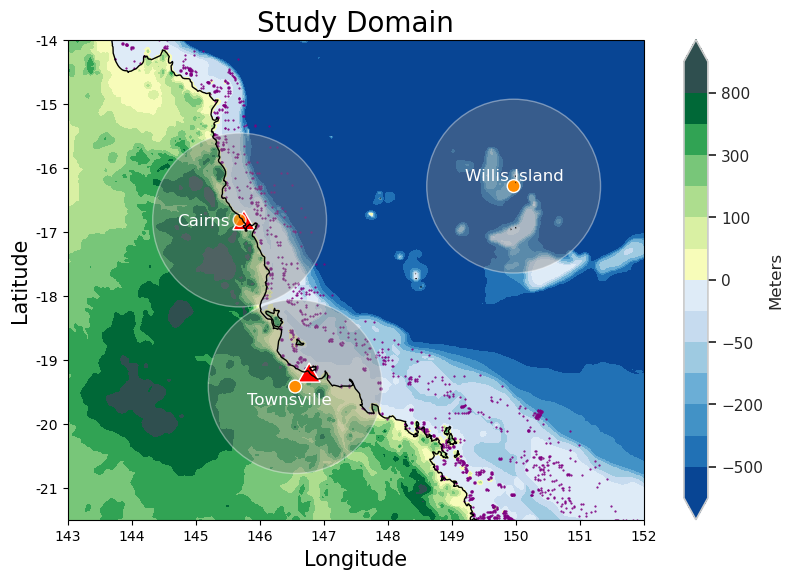

In [10]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8],projection=ccrs.PlateCarree())
ax.coastlines()
sns.set_theme(style="whitegrid")
# color = ['#084594', '#2171b5', '#4292c6', '#6baed6', '#9ecae1', '#c6dbef', '#deebf7', '#006837', '#31a354', '#78c679',
         # '#addd8e', '#d9f0a3', '#f7fcb9', '#d7ccca', '#ad9591', '#c9bc87', '#a69165', '#856b49', '#664830']
color = ['#084594', '#2171b5', '#4292c6', '#6baed6', '#9ecae1', '#c6dbef', '#deebf7', '#f7fcb9','#d9f0a3','#addd8e',
         '#78c679','#31a354','#006837','darkslategrey','#d7ccca']#'#ad9591']#, '#c9bc87']#, '#a69165', '#856b49', '#664830']
levels = [-8000, -6000, -4000, -2000, -1000, -200, -50, 0, 50, 200, 500, 1000, 1500, 2000, 3000, 4000, 5000, 6000, 7000, 8000]
levels = [-800, -500, -300, -200, -100, -50, -25, 0, 50, 100, 200, 300, 500, 800, 1000]
# levels = [-6000, -4000, -2000, -1000, -200, -50,-25, 0, 50, 200, 500, 1000, 1500, 
#           2000]
cs = ax.contourf(lon,lat,dem,levels=levels,extend="both",colors=color)
cb = plt.colorbar(cs,aspect=20,orientation='vertical',ax=ax)
cb.set_label("Meters")
ax.set_title("Study Domain",fontsize=20)
ax.set_xlim([143,152])
ax.set_xticks([143,144,145,146,147,148,149,150,151,152])
ax.set_xticklabels([143,144,145,146,147,148,149,150,151,152])
ax.set_ylim([-21.5,-14])
ax.set_yticks([-21,-20,-19,-18,-17,-16,-15,-14])
ax.set_yticklabels([-21,-20,-19,-18,-17,-16,-15,-14])
circle_T_center = mpatches.Circle((146.5509,-19.4198),0.1,alpha=1,fc="darkorange") # Townsville 
circle_C_center = mpatches.Circle((145.683,-16.817),0.1,alpha=0.8,fc="darkorange") # Cairns 
circle_W_center = mpatches.Circle((149.9646,-16.2874),0.1,alpha=1,fc="darkorange") # Willis Island 
circle_T_station = mpatches.RegularPolygon((146.77,-19.25), numVertices=3,radius=0.2,alpha=1,fc="red") # Townsville station
circle_C_station = mpatches.RegularPolygon((145.75,-16.87), numVertices=3,radius=0.2,alpha=1,fc="red") # Cairns station
circle_T = mpatches.Circle((146.5509,-19.4198),1.358,alpha=0.4,fc="grey") # Townsville
circle_C = mpatches.Circle((145.683,-16.817),1.358,alpha=0.4,fc="grey") # Cairns
circle_W = mpatches.Circle((149.9646,-16.2874),1.358,alpha=0.4,fc="grey") # Willis Island

# plot gbr locations
ax.scatter(gbr_coordinates[:, 0], gbr_coordinates[:, 1], color='purple', marker='o',s=0.3)
c_radar = np.arange(144.35,147.5,1)
# c_radar_lat = []
# for i in c_radar:
#     c_radar_lat.append(-17.3)
# plt.plot(c_radar,c_radar_lat,color='darkorange')
# circle_T_barra = mpatches.Circle((146.77,-19.25),0.1,alpha=0.9,fc="yellow") # Townsville
# circle_C_barra = mpatches.Circle((145.75,-16.817),0.1,alpha=0.9,fc="yellow") # Cairns -16.9,-16.7,145.7,145.8
ax.add_patch(circle_T)
ax.add_patch(circle_C)
ax.add_patch(circle_W)
# ax.add_patch(circle_T_barra)
# ax.add_patch(circle_C_barra)
ax.add_patch(circle_T_station)
ax.add_patch(circle_C_station)
ax.add_patch(circle_T_center)
ax.add_patch(circle_C_center)
ax.add_patch(circle_W_center)
ax.set_xlabel("Longitude",fontsize=15)
ax.set_ylabel("Latitude",fontsize=15) 
ax.annotate("Townsville",(145.8,-19.7),color='white',fontsize=12)
ax.annotate("Cairns",(144.7,-16.9),color='white',fontsize=12)
ax.annotate("Willis Island",(149.2,-16.2),color='white',fontsize=12)

Text(0, 0.5, 'Latitude')

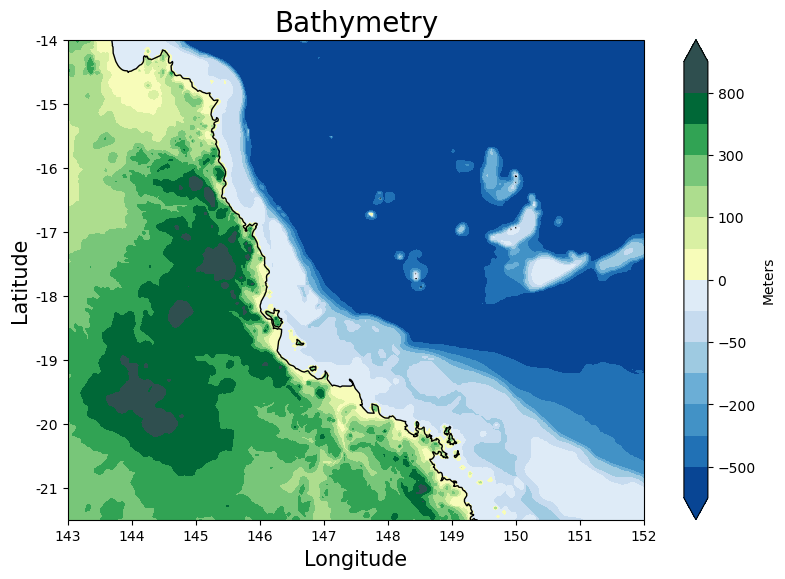

In [7]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8],projection=ccrs.PlateCarree())
ax.coastlines()
# color = ['#084594', '#2171b5', '#4292c6', '#6baed6', '#9ecae1', '#c6dbef', '#deebf7', '#006837', '#31a354', '#78c679',
         # '#addd8e', '#d9f0a3', '#f7fcb9', '#d7ccca', '#ad9591', '#c9bc87', '#a69165', '#856b49', '#664830']
color = ['#084594', '#2171b5', '#4292c6', '#6baed6', '#9ecae1', '#c6dbef', '#deebf7', '#f7fcb9','#d9f0a3','#addd8e',
         '#78c679','#31a354','#006837','darkslategrey','#d7ccca']#'#ad9591']#, '#c9bc87']#, '#a69165', '#856b49', '#664830']
levels = [-8000, -6000, -4000, -2000, -1000, -200, -50, 0, 50, 200, 500, 1000, 1500, 2000, 3000, 4000, 5000, 6000, 7000, 8000]
levels = [-800, -500, -300, -200, -100, -50, -25, 0, 50, 100, 200, 300, 500, 800, 1000]
# levels = [-6000, -4000, -2000, -1000, -200, -50,-25, 0, 50, 200, 500, 1000, 1500, 
#           2000]
cs = ax.contourf(lon,lat,dem,levels=levels,extend="both",colors=color)
cb = plt.colorbar(cs,aspect=20,orientation='vertical',ax=ax)
cb.set_label("Meters")
ax.set_title("Bathymetry",fontsize=20)
ax.set_xlim([143,152])
ax.set_xticks([143,144,145,146,147,148,149,150,151,152])
ax.set_xticklabels([143,144,145,146,147,148,149,150,151,152])
ax.set_ylim([-21.5,-14])
ax.set_yticks([-21,-20,-19,-18,-17,-16,-15,-14])
ax.set_yticklabels([-21,-20,-19,-18,-17,-16,-15,-14])
ax.set_xlabel("Longitude",fontsize=15)
ax.set_ylabel("Latitude",fontsize=15)

Text(0.5, 1.0, 'Cairns (lat=-16.82)')

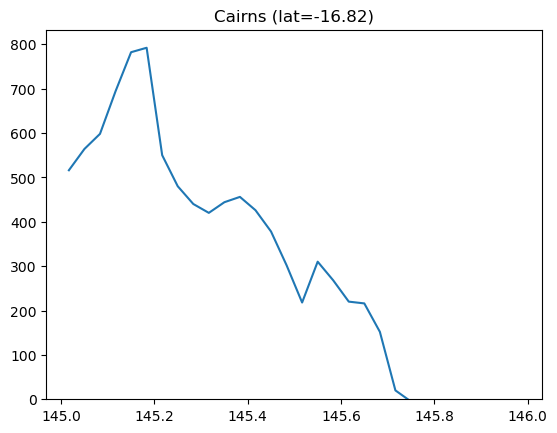

In [57]:
ax = plt.subplot(1, 1, 1)
sel_lat = ds.sel(y=-16.82,method="nearest").sel(x=slice(145,146))
plt.plot(sel_lat["x"],sel_lat["z"])
ax.set_ylim(bottom=0.)
ax.set_title("Cairns (lat=-16.82)")